## 1. Construct the matrix representing the chain

In [89]:
import numpy as np
import matplotlib.pyplot as plt



def construct_hamiltonian(N:int,t:float,t_prime:float,mu_A=None,mu_B=None,potentials=False)->np.ndarray:
    
    H  = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i+1 == j and i%1==0 and i>0:
                H[i,j] = t_prime
            if i+1 == j and i%2==0:
                H[i,j] = t
            if i-1 == j and i%1==0 and i>0:
                H[i,j] = t
            if i-1 == j and i%2==0:
                H[i,j] = t_prime

                
            if potentials:
                if i == j and i%2==0:
                    H[i,j] = mu_A
                if i==j and i%1 ==0 and i>0:
                    H[i,j] = mu_B
    return H

N = 33
t = 1
t_prime = 2
H = construct_hamiltonian(N,t,t_prime)
print(H)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 2. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 2.]
 [0. 0. 0. ... 0. 2. 0.]]


## 2. Discuss the three cases, a) $t<t'$, b) $t=t'$, c) $t>t'$.

## 3. Plot the eigenvalues in ascending order. For which of the cases do you find the zero energy modes?

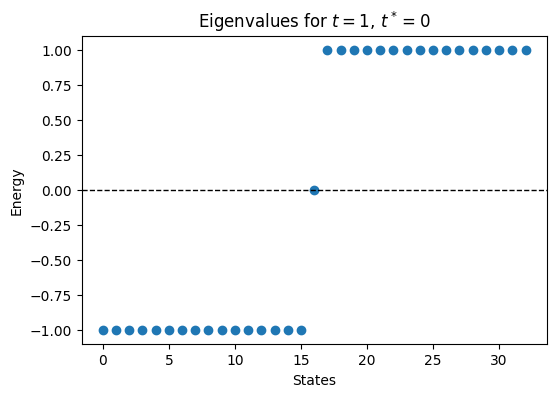

the approx 0 eigenvalue value is:[0.]


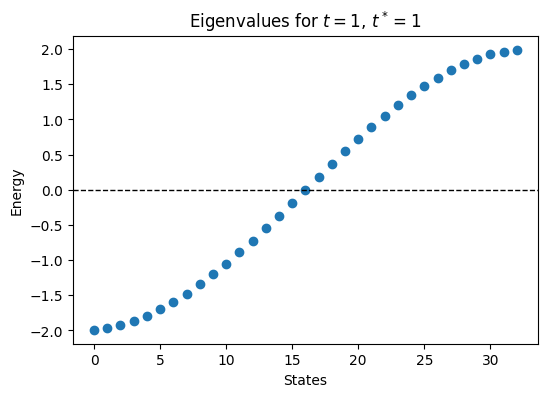

the approx 0 eigenvalue value is:[-1.56879525e-16]


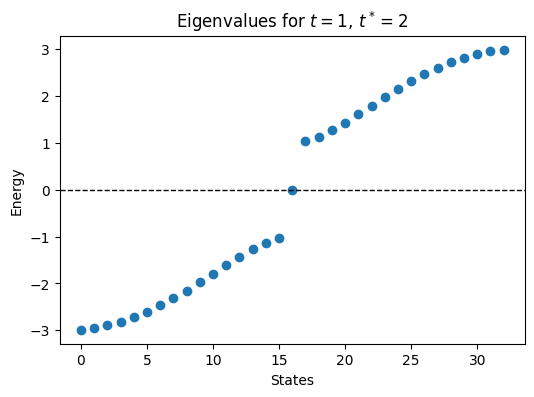

the approx 0 eigenvalue value is:[-1.42019771e-15]


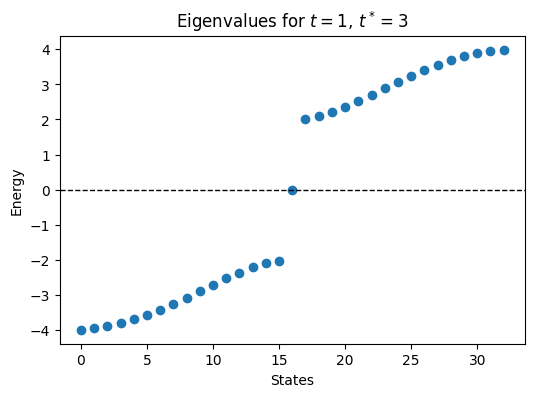

the approx 0 eigenvalue value is:[4.4408921e-15]


In [85]:
def plot_eigenvals(H:np.ndarray, t:float, t_prime:float)->tuple[np.ndarray,np.ndarray]:
    eigenvals,eigenvecs = np.linalg.eig(H)
    plt.figure(figsize=(6,4))
    plt.title(f'Eigenvalues for $t=${t}, $t^*=${t_prime}')
    plt.plot(sorted(eigenvals), 'o')
    plt.axhline(0, color='black', lw=1, ls='--')
    plt.xlabel('States')
    plt.ylabel('Energy')
    plt.show()
    return eigenvals,eigenvecs

for t,t_prime in [(1,0),(1,1),(1,2),(1,3)]:
    H = construct_hamiltonian(N,t,t_prime)
    eigenvals, eigenvecs =  plot_eigenvals(H,t,t_prime)
    print(f'the approx 0 eigenvalue value is:{eigenvals[np.isclose(eigenvals,0,1e-10)]}')

## 4. If you find zero energy modes for any of the cases, plot the norm of the corresponding eigenvector with respect to the latice sites, and comment on where and to which extent the wave function is localized.

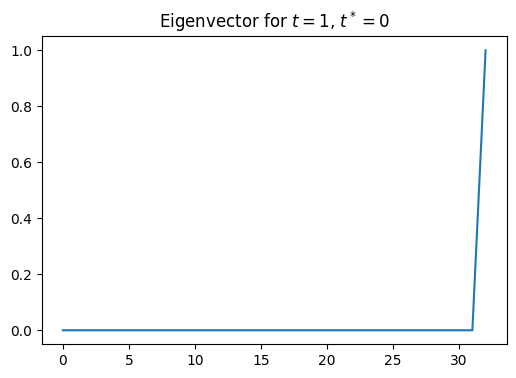

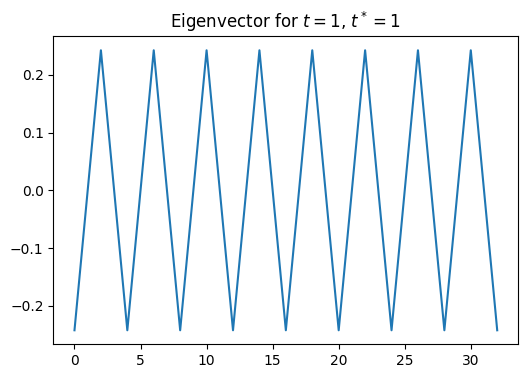

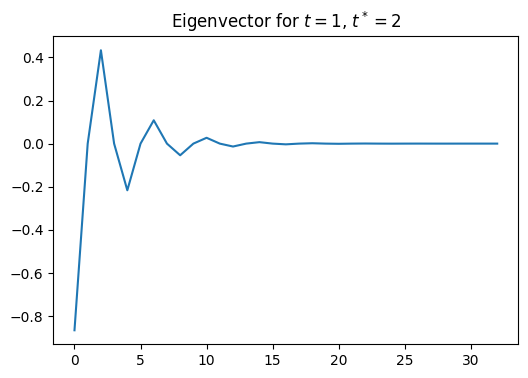

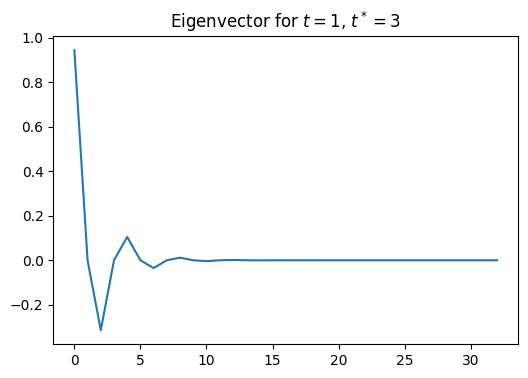

In [88]:
def plot_eigenvec(H:np.ndarray,t:float,t_prime:float)-> None:
    eigenvals, eigenvecs =  np.linalg.eig(H)
    zero_value_eigenvec = eigenvecs[:,np.isclose(eigenvals,0,1e-10)]
    plt.figure(figsize=(6,4))
    plt.title(f'Eigenvector for $t=${t}, $t^*=${t_prime}')
    plt.plot(np.squeeze(zero_value_eigenvec),label=f't={t},t_prime={t_prime}')
    plt.show()

for t,t_prime in [(1,0),(1,1),(1,2),(1,3)]:
    H = construct_hamiltonian(N,t,t_prime)
    plot_eigenvec(H,t,t_prime)


